In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix

# Correct way:
data = pd.read_csv('https://drive.google.com/uc?id=1uTH3KaGybY6KAIQPww4nK0_ZMlytmdZW')




In [8]:
data.head()

,ID,Name,Gender,Age,Year,Smoking Status,Sleep Pattern?,Physical Activity,Work Load,Screen time,...,Dietary Habits,History of Mental illness,History of Substance Abuse,Family History of Depression,Chronic Medical Condition,How often do you hang out,Homesickness,Do you feel isolated or lonely even when you're surrounded by people,Have you ever sought professional help for mental health issues,How often do you talk about your mental health with other people?
0,1,Aditi Ghosh,Female,19,2,Non-Smoker,Good,Moderate,Moderate,High,...,Moderate,No,No,Yes,No,Daily,Yes,Maybe,No,Rarely
1,2,Priyam Shree,Male,21,4,Non-Smoker,Poor,Moderate,High,High,...,Moderate,No,Yes,Yes,Yes,Weekly,No,Yes,Yes,Never
2,3,Deepa,Female,18,2,Non-Smoker,Poor,Moderate,High,High,...,Moderate,Yes,No,No,No,Never,Yes,Yes,No,Rarely
3,4,Lavina Peter,Female,20,2,Non-Smoker,Good,Moderate,High,High,...,Moderate,No,No,No,No,Daily,No,No,No,Rarely
4,5,Sharanya,Female,34,1,Non-Smoker,Good,Sedentary,High,High,...,Moderate,No,No,Yes,No,Weekly,Yes,No,No,Regularly


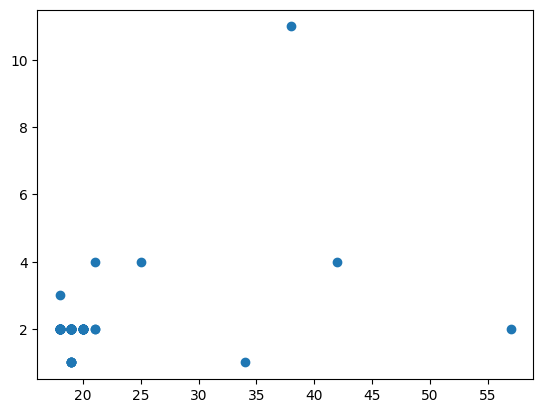

In [9]:
import matplotlib.pyplot as plt
x=data['Age']
y=data['Year']

plt.scatter(x,y)
plt.show()

In [10]:
data.describe()

,ID,Age,Year
count,103.000000,103.000000,103.000000
mean,52.000000,19.922330,2.097087
std,29.877528,5.017009,0.985329
min,1.000000,18.000000,1.000000
25%,26.500000,18.000000,2.000000
50%,52.000000,19.000000,2.000000
75%,77.500000,19.500000,2.000000
max,103.000000,57.000000,11.000000


In [11]:
data.isnull().sum()

ID                                                                      0
Name                                                                    0
Gender                                                                  0
Age                                                                     0
Year                                                                    0
Smoking Status                                                          0
Sleep Pattern?                                                          0
Physical Activity                                                       0
Work Load                                                               0
Screen time                                                             0
Alcohol Consumption?                                                    0
Dietary Habits                                                          0
History of Mental illness                                               0
History of Substance Abuse            

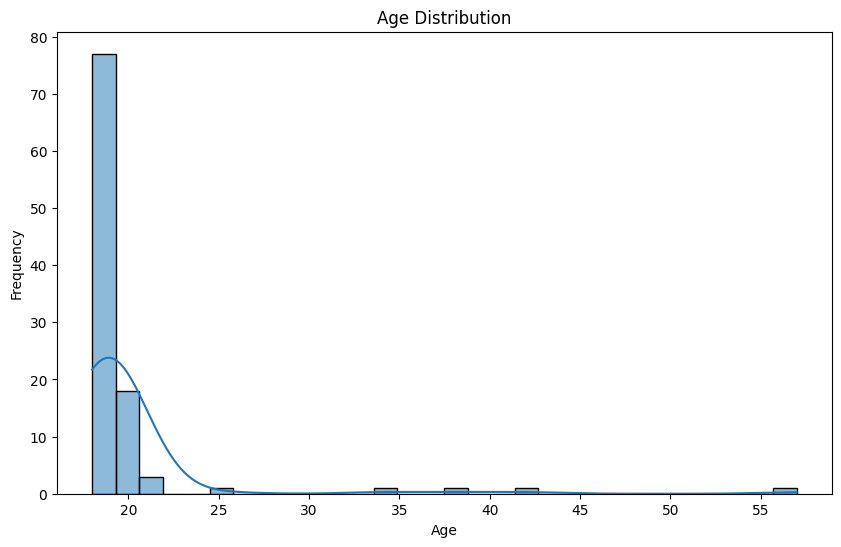

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [13]:
smokers = data["Smoking Status"].value_counts()
smokers 

Smoking Status
Non-Smoker    99
Smoker         3
Former         1
Name: count, dtype: int64

In [14]:
communication=data["How often do you talk about your mental health with other people?"].value_counts()
communication

How often do you talk about your mental health with other people?
Rarely       53
Never        40
Regularly    10
Name: count, dtype: int64

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

#data = data.drop(columns=['Name'], errors='ignore')

data['Depression_Risk'] = np.where(
    (data['Sleep Pattern?'] == 'Poor') |
    (data.get('Do you feel isolated or lonely even when you are surrounded by people') == 'Yes') |
    (data['Physical Activity'] == 'Sedentary') |
    (data['Alcohol Consumption?'] == 'Regularly') |
    (data['Work Load'] == 'High'), 
    1, 0
)



print("\nClass Distribution:")
print(data['Depression_Risk'].value_counts())

X = data.drop(columns=['Depression_Risk', 'Name', 'ID'], errors='ignore')
y = data['Depression_Risk']



label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print("\nLogistic Regression Results:")
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print(classification_report(y_test, y_pred_log))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")

print("\nK-Nearest Neighbors (KNN) Results:")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print(classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")



Class Distribution:
Depression_Risk
1    62
0    41
Name: count, dtype: int64

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

Logistic Regression Accuracy: 0.90

K-Nearest Neighbors (KNN) Results:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       1.00      0.77      0.87        13

    accuracy                           0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.90      0.86      0.86        21

KNN Accuracy: 0.86


/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_s

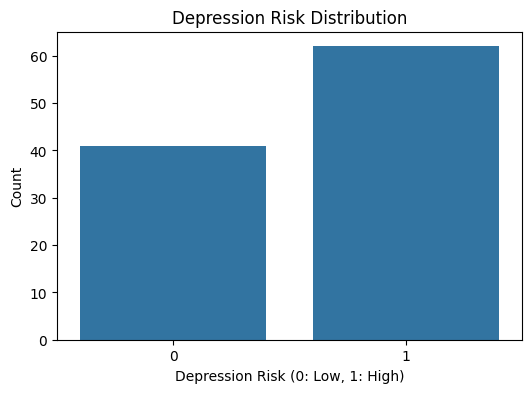

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data['Depression_Risk'] = np.where(
    (data['Sleep Pattern?'] == 'Poor') |
    (data.get('Do you feel isolated or lonely even when you are surrounded by people') == 'Yes') |
    (data['Physical Activity'] == 'Sedentary') |
    (data['Alcohol Consumption?'] == 'Regularly') |
    (data['Work Load'] == 'High'), 
    1, 0
)

plt.figure(figsize=(6, 4))
sns.countplot(x='Depression_Risk', data=data)
plt.title('Depression Risk Distribution')
plt.xlabel('Depression Risk (0: Low, 1: High)')
plt.ylabel('Count')
plt.show()


/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_s

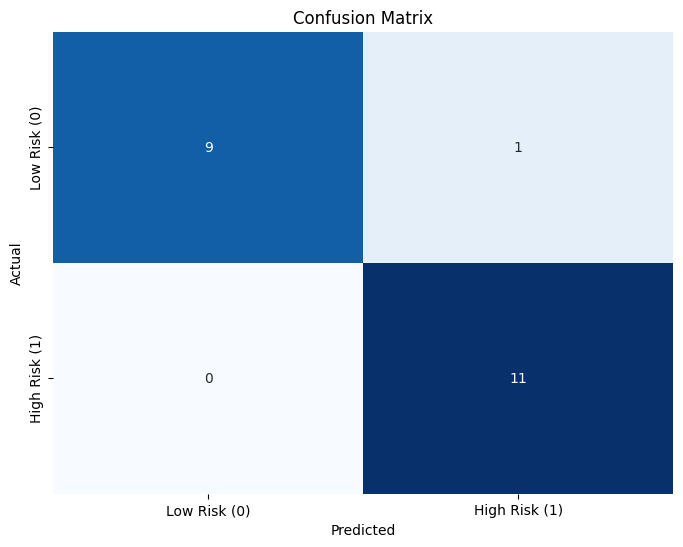

In [26]:

X = data.drop(columns=['Depression_Risk', 'Name', 'ID'], errors='ignore')
y = data['Depression_Risk']


label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Save the encoder if you need to inverse later


scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale the features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=200)  # Increased max_iter to 200
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Risk (0)', 'High Risk (1)'],
            yticklabels=['Low Risk (0)', 'High Risk (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


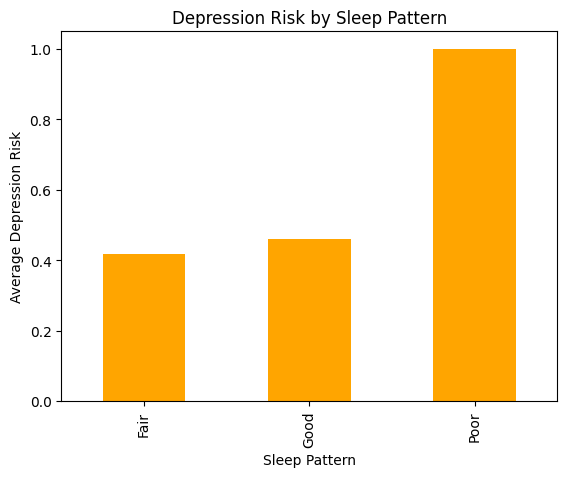

In [29]:
data.groupby('Sleep Pattern?')['Depression_Risk'].mean().plot(kind='bar', color='orange')
plt.title('Depression Risk by Sleep Pattern')
plt.xlabel('Sleep Pattern')
plt.ylabel('Average Depression Risk')
plt.show()


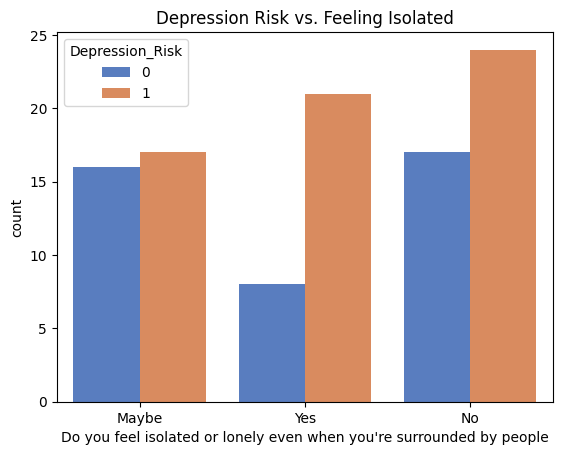

In [30]:
import seaborn as sns

#sns.countplot(data=data, x='Homesickness', hue='Depression_Risk', palette='pastel')
#plt.title('Depression Risk vs. Homesickness')
#plt.show()

sns.countplot(data=data, x='Do you feel isolated or lonely even when you\'re surrounded by people', 
              hue='Depression_Risk', palette='muted')
plt.title('Depression Risk vs. Feeling Isolated')
plt.show()


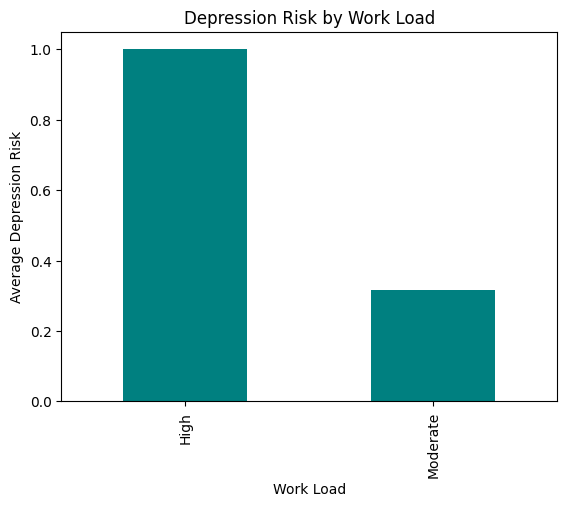

In [31]:
data.groupby('Work Load')['Depression_Risk'].mean().plot(kind='bar', color='teal')
plt.title('Depression Risk by Work Load')
plt.xlabel('Work Load')
plt.ylabel('Average Depression Risk')
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('https://drive.google.com/uc?id=1uTH3KaGybY6KAIQPww4nK0_ZMlytmdZW')


data['Depression_Risk'] = np.where(
    (data['Sleep Pattern?'] == 'Poor') |
    (data['Work Load'] == 'High') |
    (data['Physical Activity'] == 'Sedentary') |
    (data['Alcohol Consumption?'] == 'Regularly') |
    (data['Screen time'] == 'High') |
    (data['History of Mental illness'] == 'Yes') |
    (data['History of Substance Abuse'] == 'Yes') |
    (data['Family History of Depression'] == 'Yes') |
    (data['Homesickness'] == 'Yes'), 
    1, 0
)

# Print class distribution
print("\nClass Distribution:")
print(data['Depression_Risk'].value_counts())

# Separate features and target
X = data.drop(columns=['Depression_Risk', 'Name', 'ID'], errors='ignore')
y = data['Depression_Risk']

# Encode categorical features
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
        
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

# Make predictions and print results
y_pred_log = log_reg.predict(X_test_scaled)

print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_log))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")



Class Distribution:
Depression_Risk
1    89
0    14
Name: count, dtype: int64

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.94      0.97        18

    accuracy                           0.95        21
   macro avg       0.88      0.97      0.91        21
weighted avg       0.96      0.95      0.96        21

Logistic Regression Accuracy: 0.95


/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/user1/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_s

In [46]:
def give_recommendations(row):
    recommendations = []

    if row['Smoking Status'] == 'Yes':
        recommendations.append("Consider quitting smoking to improve mental health.")
    
    if row['Sleep Pattern?'] == 'Poor':
        recommendations.append("Try to establish a healthy sleep routine.")
    
    if row['Physical Activity'] == 'Sedentary':
        recommendations.append("Incorporate physical activities like walking, yoga, or swimming.")

    if row['Alcohol Consumption?'] == 'Regularly':
        recommendations.append("Reduce alcohol consumption to enhance mental well-being.")
    
    if row['Work Load'] == 'High':
        recommendations.append("Manage workload effectively and take regular breaks to avoid burnout.")
    
    if row['Screen time'] == 'High':
        recommendations.append("Limit screen time and take breaks to protect mental health.")
    
    if row['History of Mental illness'] == 'Yes':
        recommendations.append("Continue monitoring your mental health and seek professional help when needed.")
    
    if row['History of Substance Abuse'] == 'Yes':
        recommendations.append("Seek support to prevent relapse and maintain recovery.")
    
    if row['Family History of Depression'] == 'Yes':
        recommendations.append("Be mindful of genetic predisposition and take proactive steps for well-being.")
    
    if row['Homesickness'] == 'Yes':
        recommendations.append("Stay connected with loved ones to alleviate homesickness.")
    
    if not recommendations:
        return "You're on the right track! Keep maintaining your lifestyle."

    return "\n".join(recommendations)


def get_recommendations_for_person(name, data, model, scaler, label_encoders):
    # Find the person's data based on the name
    person_data = data[data['Name'].str.lower() == name.lower()]

    if person_data.empty:
        print(f"No data found for {name}. Please check the name and try again.")
        return

    # Preprocess the person's data (encode and scale)
    X = person_data.drop('Depression_Risk', axis=1)

    for column, le in label_encoders.items():
        X[column] = le.transform(X[column])

    X_scaled = scaler.transform(X)

    # Predict depression risk
    prediction = model.predict(X_scaled)[0]

    print(f"\nRecommendations for {name}:")
    if prediction == 1:  # High Depression Risk
        print(give_recommendations(person_data.iloc[0]))
    else:
        print(f"{name} is not at high risk of depression. Keep up the good work!")

name = input("Enter the name of the person: ")
get_recommendations_for_person(name, data, log_reg, scaler, label_encoders)


: 

: 

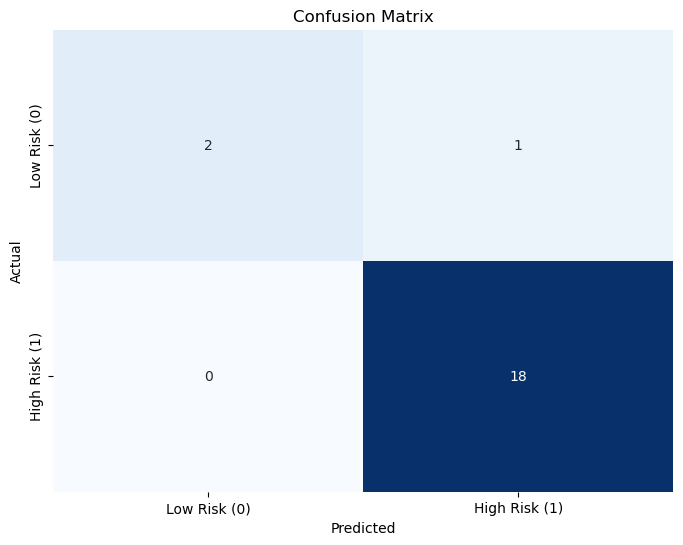

In [ ]:

X = data.drop('Depression_Risk', axis=1)
y = data['Depression_Risk']


label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le  # Save the encoder if you need to inverse later


scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale the features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=200)  # Increased max_iter to 200
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Low Risk (0)', 'High Risk (1)'],
            yticklabels=['Low Risk (0)', 'High Risk (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
not_depressed = data[data['Depression_Risk'] == 0]

print("\nPeople who aren't close to depression:")
print(not_depressed[['Name', 'Age']])



People who aren't close to depression:
                        Name  Age
10              Kabir Gupta    19
22             Shiwank Kumar   19
32             Bhavya Suman    20
52                  Tejaswi    20
59            Sneha Trivedi    19
60            Harsh Trivedi    20
63      KRISHNAPRIYA V NAIR    19
64      KRISHNAPRIYA V NAIR    19
67  Priyanshu Shekhar Behera   20
72                   Soneesh   18
76           V Naga Preetam    18
86       karthikeyan pandita   19
93         N chethan krishna   18
99                   Thorani   18


In [ ]:
print(f"ID 5: {'Depressed' if data.loc[data['ID'] == 5, 'Depression_Risk'].values[0] == 1 else 'Not Depressed'}")


ID 5: Depressed


In [ ]:
import joblib

joblib.dump(model, 'depression_model.pkl')    # Save model
joblib.dump(scaler, 'scaler.pkl')             # Save scaler
joblib.dump(label_encoders, 'label_encoders.pkl') # Save encoders (dictionary)


['label_encoders.pkl']